In [3]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
X=np.random.normal(10, 5, 100)
np.mean(X)

9.555648391498108

In [4]:
X

array([ 9.04671843, 10.96899607, 10.36499297, 14.76356677, 11.97382237,
       11.20225825,  7.09123793, 13.8338706 , 11.60634145, 18.77904262,
       11.41018585,  5.70203528, 14.89016113, 14.75476213, 16.20709374,
       12.74086405, 11.59905553, 17.63742971,  5.9147157 , 10.72009176,
        6.36772476, 15.85440091,  5.963455  , 10.00810395,  6.52675279,
       10.54471118,  5.83870761, 12.16843964, 12.19469565,  9.48673813,
        9.80580157,  9.48865368,  8.81441547, 10.80955452,  9.4977505 ,
       12.78182648,  5.80135584, 18.54856036, 10.85596067,  1.6826656 ,
        2.55302599, 14.19623449,  7.76199732,  8.12972121, 16.27888197,
       12.13448608, 14.33349362,  9.04242435, 12.78493627,  3.50683953,
       14.18977212, 12.77863864,  5.40848682, 10.53991657, 12.39483357,
        4.15201117,  5.38871024,  8.24043218,  7.39548735,  6.59877022,
        7.58687292, 18.9064498 , 20.08314996,  2.26848522, 11.76857287,
        8.4920637 ,  7.53561299,  7.82635376, 17.01081517, 10.77

(array([  8.,  22.,  86., 187., 208., 223., 144.,  81.,  30.,  11.]),
 array([ 8.44720451,  8.668541  ,  8.88987748,  9.11121396,  9.33255044,
         9.55388692,  9.7752234 ,  9.99655989, 10.21789637, 10.43923285,
        10.66056933]),
 <BarContainer object of 10 artists>)

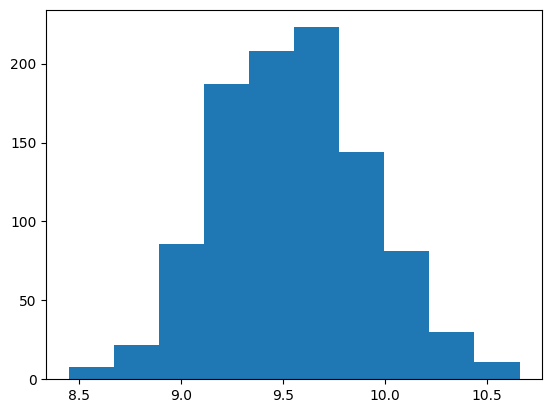

In [5]:
samples=[]
for i in range(1000):
  samples+=[rd.sample(list(X), 60)]
means=[]
for sample in samples:
  means+=[np.mean(sample)]
plt.hist(means)

In [6]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
X=load_wine()['data']
Y=load_wine()['target']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=100)

models=[]
for i in range(50):
  model=DecisionTreeClassifier()
  model.fit(X=X_train, y=Y_train)
  models+=[model]

In [8]:
preds=[]
acc=[]
for model in models:
  preds+=[model.predict(X_test)]
  acc+=[accuracy_score(y_true=Y_test,y_pred=model.predict(X_test))]

<ipython-input-9-b6ab8b80e415>:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  bagging_pred=pd.DataFrame(preds).transpose().apply(lambda x: st.mode(x)[0][0],axis=1).values


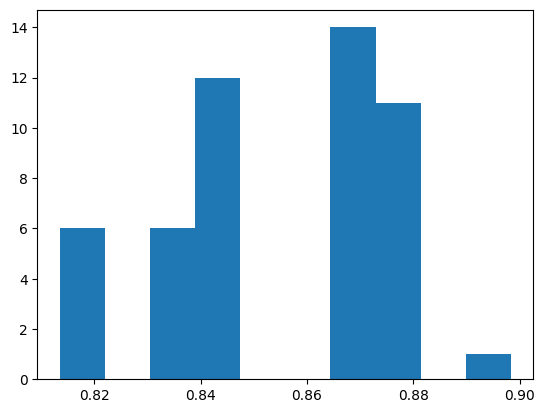

In [9]:
import scipy.stats as st
from sklearn.metrics import accuracy_score
bagging_pred=pd.DataFrame(preds).transpose().apply(lambda x: st.mode(x)[0][0],axis=1).values
accuracy_score(y_true=Y_test,y_pred=bagging_pred)
plt.hist(acc);

In [ ]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(n_estimators=50, oob_score=True)
model.fit(X_train,Y_train)
accuracy_score(y_true=Y_test,y_pred=model.predict(X_test))

0.864406779661017

In [ ]:
model.oob_score_

0.9411764705882353

In [ ]:
from numpy import sqrt
X=np.random.normal(5, 2, 100)
samples=[]
for i in range(1000):
  samples+=[rd.sample(list(X), 60)]
mu=np.mean(X)
X2=[x**2 for x in X]
sigma=sqrt(len(X)*(np.mean(X2)-mu**2)/(len(X)-1))
print(mu, sigma)

4.832169669629796 2.0797860274002575


In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import precision_score
lb=LabelBinarizer()
X=load_wine()['data']
Y=load_wine()['target']
y1=lb.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X,y1,test_size=0.25,random_state=100)
model=DecisionTreeClassifier()
model.fit(X=X_train, y=Y_train)
y_pred=model.predict(X_test)
precision_score(Y_test,y_pred,average='micro')

0.8222222222222222

In [ ]:
from sklearn.ensemble import BaggingClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=100)
model=BaggingClassifier(n_estimators=50,oob_score=True)
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
precision_score(Y_test,y_pred,average='micro')

0.8666666666666667

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
! unzip /content/default+of+credit+card+clients.xls

--2023-04-12 14:15:35--  http://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5539328 (5.3M) [application/x-httpd-php]
Saving to: ‘default of credit card clients.xls’

default of credit c 100%[===================>]   5.28M  11.4MB/s    in 0.5s    

2023-04-12 14:15:36 (11.4 MB/s) - ‘default of credit card clients.xls’ saved [5539328/5539328]

unzip:  cannot find or open /content/default+of+credit+card+clients.xls, /content/default+of+credit+card+clients.xls.zip or /content/default+of+credit+card+clients.xls.ZIP.


In [ ]:
df=pd.read_excel('/content/default of credit card clients.xls', header=1)
X=df.iloc[:,1:-1]
Y=df.iloc[:,-1].values

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=100)
for i in [16,20,50,100]:
  model=RandomForestClassifier(n_estimators=i)
  model.fit(X_train,Y_train)
  print(i, precision_score(Y_test,model.predict(X_test),average='micro'))

16 0.9777777777777777
20 1.0
50 0.9777777777777777
100 1.0


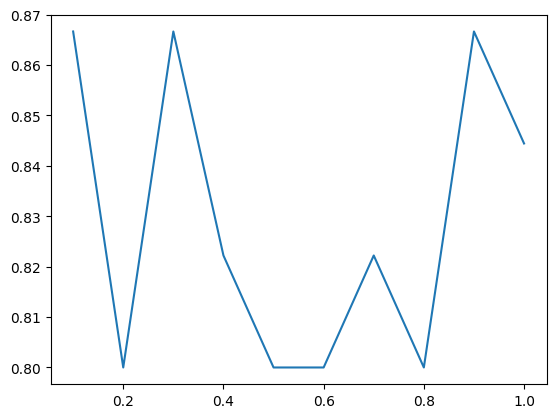

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
X=load_wine()['data']
Y=load_wine()['target']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=100)
models=[]
model=DecisionTreeClassifier(random_state=1)
for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
  ada = AdaBoostClassifier(estimator=model,n_estimators=100, learning_rate=i)
  ada.fit(X_train, Y_train)
  pred=ada.predict(X_test)
  models+=[accuracy_score(y_true=Y_test,y_pred=ada.predict(X_test))]
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], models)

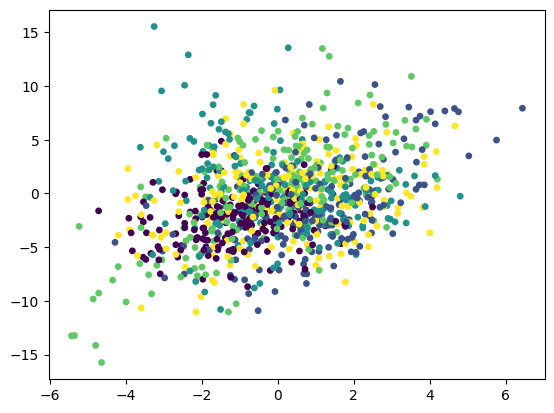

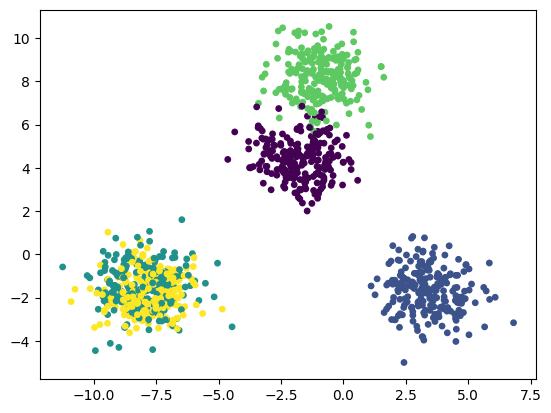

In [ ]:
from sklearn.datasets import make_classification
X1, Y1 = make_classification(n_samples=1000, n_classes = 5, n_features=15, n_informative= 8, n_redundant=7)
plt.scatter(X1[:,0], X1[:,1], marker = "o", c=np.squeeze(Y1), s=15)
from sklearn.datasets import make_blobs
X2,Y2 = make_blobs(n_samples=1092, n_features = 15, centers = 5, random_state=1)
plt.figure()
plt.scatter(X2[:,0], X2[:,1],marker = "o", c=np.squeeze(Y2), s=15)

In [ ]:
from lightgbm import LGBMClassifier
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1,test_size=0.25,random_state=100)
model=LGBMClassifier(learning_rate=0.5, n_estimators=1000)
model.fit(X1_train, Y1_train)
accuracy_score(Y1_test, model.predict(X1_test))

0.68

In [ ]:

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2,test_size=0.25,random_state=100)
model=LGBMClassifier(learning_rate=0.5, n_estimators=1000)
model.fit(X2_train, Y2_train)
accuracy_score(Y2_test, model.predict(X2_test))

1.0